In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\Peter Villarreal\Desktop\Data Analytics\Datasets\Austin's Practical Data Science\Beer Sales\Mixed_Beverage_Gross_Receipts.csv")
df.head()

,Taxpayer Number,Taxpayer Name,Taxpayer Address,Taxpayer City,Taxpayer State,Taxpayer Zip,Taxpayer County,Location Number,Location Name,Location Address,...,Inside/Outside City Limits,TABC Permit Number,Responsibility Begin Date,Responsibility End Date,Obligation End Date,Liquor Receipts,Wine Receipts,Beer Receipts,Cover Charge Receipts,Total Receipts
0,32047970895,HONDURAS MAYA CAFE & BAR LLC,8011 HAZEN ST,HOUSTON,TX,77036.0,101,1,HONDURAS MAYA CAFE & BAR LLC,5945 BELLAIRE BLVD STE B,...,Y,MB817033,08/16/2012,09/12/2019,07/31/2019,0,0,0,0,0
1,32049923835,"MERMAID KARAOKE PRIVATE CLUB, INC.",2639 WALNUT HILL LN STE 225,DALLAS,TX,75229.0,57,1,MERMAID KARAOKE PRIVATE CLUB,1310 W CAMPBELL RD STE 103,...,Y,N 837378,04/12/2013,07/01/2015,08/31/2014,480,185,1374,0,2039
2,32034036304,FENG KAI CORPORATION,8427 BOULEVARD 26,N RICHLND HLS,TX,76180.0,220,1,JAPANESE GRILL,8427 BOULEVARD 26,...,Y,MB576670,05/01/2008,03/17/2018,06/30/2016,1143,167,669,0,1979
3,14537211071,"THE HUTTO SMITHS, LLC",429 LITTLE LAKE RD,HUTTO,TX,78634.0,246,1,THE DOWNTOWN HALL OF FAME,205 EAST ST,...,Y,MB791778,12/06/2011,NaN,03/31/2018,12881,357,10447,0,23685
4,32019999229,"THE CROSSING AT FIDDLE CREEK, INC.",1620 W CEDAR ST,STEPHENVILLE,TX,76401.0,72,1,THE CROSSING AT FIDDLE CREEK INC,2004 W SWAN ST,...,Y,N 643163,10/26/2006,11/30/2013,08/31/2008,4841,2413,4620,0,11874


In [4]:
df.isnull().sum()

Taxpayer Number                     0
Taxpayer Name                       0
Taxpayer Address                    0
Taxpayer City                       0
Taxpayer State                    969
Taxpayer Zip                      969
Taxpayer County                     0
Location Number                     0
Location Name                       0
Location Address                    0
Location City                       0
Location State                      0
Location Zip                        0
Location County                     0
Inside/Outside City Limits          0
TABC Permit Number                  0
Responsibility Begin Date           0
Responsibility End Date       1665760
Obligation End Date                 0
Liquor Receipts                     0
Wine Receipts                       0
Beer Receipts                       0
Cover Charge Receipts               0
Total Receipts                      0
dtype: int64

In [5]:
df.dtypes

Taxpayer Number                 int64
Taxpayer Name                  object
Taxpayer Address               object
Taxpayer City                  object
Taxpayer State                 object
Taxpayer Zip                  float64
Taxpayer County                 int64
Location Number                 int64
Location Name                  object
Location Address               object
Location City                  object
Location State                 object
Location Zip                    int64
Location County                 int64
Inside/Outside City Limits     object
TABC Permit Number             object
Responsibility Begin Date      object
Responsibility End Date        object
Obligation End Date            object
Liquor Receipts                 int64
Wine Receipts                   int64
Beer Receipts                   int64
Cover Charge Receipts           int64
Total Receipts                  int64
dtype: object

## Who are the top sellers in the Cities stated in #1?

## Which cities sell the most beer?

In [ ]:
# Which cities recorded the highest number of establishments?

In [6]:
beer_sales = df[["Location Name", "Location City", "Location Zip", "Inside/Outside City Limits", "Beer Receipts", "Total Receipts"]]
beer_sales.head()

,Location Name,Location City,Location Zip,Inside/Outside City Limits,Beer Receipts,Total Receipts
0,HONDURAS MAYA CAFE & BAR LLC,HOUSTON,77081,Y,0,0
1,MERMAID KARAOKE PRIVATE CLUB,RICHARDSON,75080,Y,1374,2039
2,JAPANESE GRILL,NORTH RICHLAND HILLS,76180,Y,669,1979
3,THE DOWNTOWN HALL OF FAME,HUTTO,78634,Y,10447,23685
4,THE CROSSING AT FIDDLE CREEK INC,STEPHENVILLE,76401,Y,4620,11874


In [7]:
city_establishments = beer_sales[["Location Name", "Location City"]]
city_establishments.head()

,Location Name,Location City
0,HONDURAS MAYA CAFE & BAR LLC,HOUSTON
1,MERMAID KARAOKE PRIVATE CLUB,RICHARDSON
2,JAPANESE GRILL,NORTH RICHLAND HILLS
3,THE DOWNTOWN HALL OF FAME,HUTTO
4,THE CROSSING AT FIDDLE CREEK INC,STEPHENVILLE


In [8]:
# The Top 20 cities with the highest number of establishments in Texas.

establishments = city_establishments.groupby("Location City").count()
establishment_counts = establishments.sort_values("Location Name", ascending = False)
establishment_counts.columns =['Number of Establishments']
establishment_counts.head(20)

,Number of Establishments
Location City,
HOUSTON,372359
DALLAS,237780
SAN ANTONIO,181399
AUSTIN,174685
FORT WORTH,100849
EL PASO,71319
PLANO,45913
ARLINGTON,44685
LUBBOCK,41876


C:\Users\Peter Villarreal\AppData\Local\Temp\ipykernel_23752\3767664944.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_20_establishment_cities.index, rotation=90)


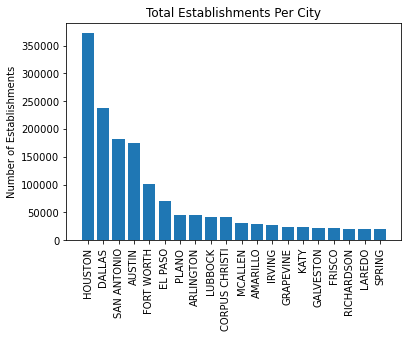

In [9]:
top_20_establishment_cities = establishment_counts.iloc[:20, ]

fig, ax = plt.subplots()
ax.bar(top_20_establishment_cities.index, top_20_establishment_cities["Number of Establishments"])
ax.set_xticklabels(top_20_establishment_cities.index, rotation=90)
ax.set_ylabel("Number of Establishments")
ax.set_title("Total Establishments Per City")
plt.show()

In [10]:
# Which cities recorded the highest amount of beer receipts?

In [11]:
city_receipts = beer_sales[["Location City", "Beer Receipts", "Total Receipts"]]
city_receipts.head()

,Location City,Beer Receipts,Total Receipts
0,HOUSTON,0,0
1,RICHARDSON,1374,2039
2,NORTH RICHLAND HILLS,669,1979
3,HUTTO,10447,23685
4,STEPHENVILLE,4620,11874


In [12]:
receipts = city_receipts.groupby("Location City").sum("Beer Receipts")
receipts_counts = receipts.sort_values("Beer Receipts", ascending = False)
receipts_counts.head(20)

,Beer Receipts,Total Receipts
Location City,,
HOUSTON,4214862141,15377837201
DALLAS,2776328598,10927265822
AUSTIN,2667334652,9369803373
SAN ANTONIO,2626989923,7768596510
FORT WORTH,1226289021,3545396909
EL PASO,914067029,2103580674
ARLINGTON,699475940,1653098970
LUBBOCK,534660104,1206695362
CORPUS CHRISTI,524969451,1262021415


C:\Users\Peter Villarreal\AppData\Local\Temp\ipykernel_23752\240789353.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_20_beer_gross_cities.index, rotation=90)


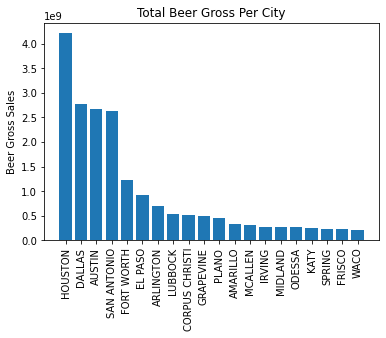

In [13]:
top_20_beer_gross_cities = receipts_counts.iloc[:20, ]

fig, ax = plt.subplots()
ax.bar(top_20_beer_gross_cities.index, top_20_beer_gross_cities["Beer Receipts"])
ax.set_xticklabels(top_20_beer_gross_cities.index, rotation=90)
ax.set_ylabel("Beer Gross Sales")
ax.set_title("Total Beer Gross Per City")
plt.show()

## Who are the top sellers in the Cities stated in #1?

In [14]:
# Which breweries/bars/restaurants sell the most beer?

In [8]:
## Getting Austin only info

beer_sales_establishments = beer_sales[["Location Name", "Location City", "Beer Receipts", "Total Receipts"]]
beer_sales_establishments.head()

austin = beer_sales_establishments["Location City"].isin(["AUSTIN"])
austin_establishments = beer_sales_establishments[austin]

austin_receipts = austin_establishments.groupby("Location Name").sum("Beer Receipts")
austin_receipts_counts = austin_receipts.sort_values("Beer Receipts", ascending = False)
austin_receipts_counts.head(5)

,Beer Receipts,Total Receipts
Location Name,,
ALAMO DRAFTHOUSE CINEMA,32185560,74079196
LITTLE WOODROW'S,26013366,45154068
BRAZOS CONCESSIONS CO/SALT LICK JOINT VENTURE,25730354,58102385
OJOS LOCOS SPORTS CANTINA,18645585,26786956
BLIND PIG PUB / PIG PEN,18483150,49192362


C:\Users\Peter Villarreal\AppData\Local\Temp\ipykernel_6952\1206226740.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_10_austin_establishments.index, rotation=90)


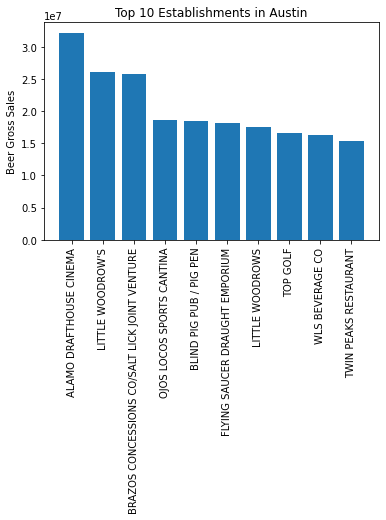

In [9]:
top_10_austin_establishments = austin_receipts_counts.iloc[:10, ]

fig, ax = plt.subplots()
ax.bar(top_10_austin_establishments.index, top_10_austin_establishments["Beer Receipts"])
ax.set_xticklabels(top_10_austin_establishments.index, rotation=90)
ax.set_ylabel("Beer Gross Sales")
ax.set_title("Top 10 Establishments in Austin")
plt.show()

In [10]:
## Getting Houston only info

houston = beer_sales_establishments["Location City"].isin(["HOUSTON"])
houston_establishments = beer_sales_establishments[houston]

houston_receipts = houston_establishments.groupby("Location Name").sum("Beer Receipts")
houston_receipts_counts = houston_receipts.sort_values("Beer Receipts", ascending = False)
houston_receipts_counts.head(5)

,Beer Receipts,Total Receipts
Location Name,,
LEVY RESTAURANTS AT TOYOTA CENTER,73453132,143895192
ARAMARK SPORTS & ENTERTAINMENT SERVICES OF TEXAS,48207154,96365433
FOUR FAMILIES OF HOUSTON,46939000,111103760
OJOS LOCOS SPORTS CANTINA,46574045,74627418
ARAMARK SPORTS & ENTERTAINMENT SER OF TEXAS INC,42653186,85814975


C:\Users\Peter Villarreal\AppData\Local\Temp\ipykernel_6952\1530033239.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_10_houston_establishments.index, rotation=90)


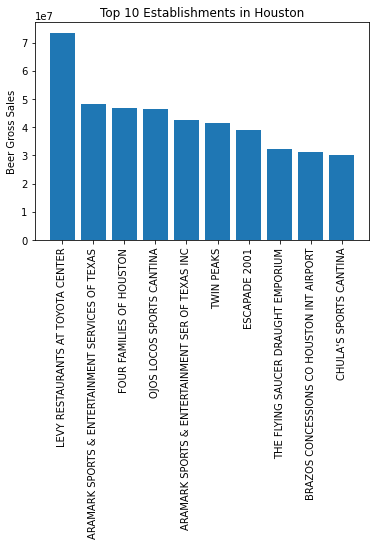

In [11]:
top_10_houston_establishments = houston_receipts_counts.iloc[:10, ]

fig, ax = plt.subplots()
ax.bar(top_10_houston_establishments.index, top_10_houston_establishments["Beer Receipts"])
ax.set_xticklabels(top_10_houston_establishments.index, rotation=90)
ax.set_ylabel("Beer Gross Sales")
ax.set_title("Top 10 Establishments in Houston")
plt.show()

In [12]:
## Getting San Antonio only info

san_antonio = beer_sales_establishments["Location City"].isin(["SAN ANTONIO"])
san_antonio_establishments = beer_sales_establishments[san_antonio]

san_antonio_receipts = san_antonio_establishments.groupby("Location Name").sum("Beer Receipts")
san_antonio_receipts_counts = san_antonio_receipts.sort_values("Beer Receipts", ascending = False)
san_antonio_receipts_counts.head(5)

,Beer Receipts,Total Receipts
Location Name,,
ARAMARK SPORTS AND ENTERTAINMENT SERVICES OF TEXAS,84151760,154242565
BUFFALO WILD WINGS,42167999,56785244
"HOSPITALITY INTERNATIONAL, INC.",34956561,166565001
COWBOYS,30817185,59208919
TWIN PEAKS,30794144,46038943


C:\Users\Peter Villarreal\AppData\Local\Temp\ipykernel_6952\191931187.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_10_san_antonio_establishments.index, rotation=90)


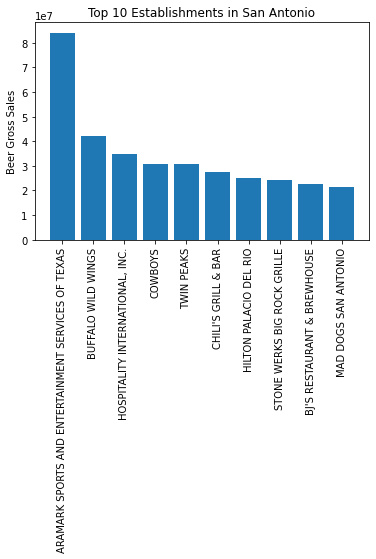

In [13]:
top_10_san_antonio_establishments = san_antonio_receipts_counts.iloc[:10, ]

fig, ax = plt.subplots()
ax.bar(top_10_san_antonio_establishments.index, top_10_san_antonio_establishments["Beer Receipts"])
ax.set_xticklabels(top_10_san_antonio_establishments.index, rotation=90)
ax.set_ylabel("Beer Gross Sales")
ax.set_title("Top 10 Establishments in San Antonio")
plt.show()

In [14]:
## Getting Dallas only info

dallas = beer_sales_establishments["Location City"].isin(["DALLAS"])
dallas_establishments = beer_sales_establishments[dallas]

dallas_receipts = dallas_establishments.groupby("Location Name").sum("Beer Receipts")
dallas_receipts_counts = dallas_receipts.sort_values("Beer Receipts", ascending = False)
dallas_receipts_counts.head(5)

,Beer Receipts,Total Receipts
Location Name,,
LEVY RESTAURANTS,45054908,115312075
"SALC, INC.",39599369,167426965
BABY DOLLS TOPLESS SALOON,34309946,94310285
FAR WEST,28985801,41738337
COWBOY'S RED RIVER,28183254,65738525


C:\Users\Peter Villarreal\AppData\Local\Temp\ipykernel_6952\4008338468.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_10_dallas_establishments.index, rotation=90)


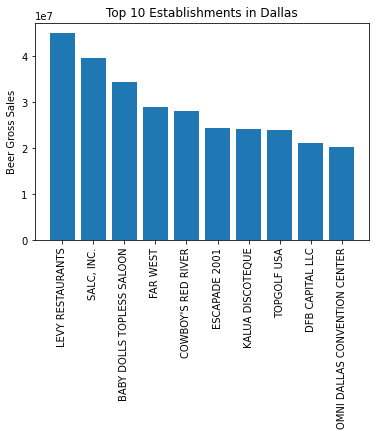

In [15]:
top_10_dallas_establishments = dallas_receipts_counts.iloc[:10, ]

fig, ax = plt.subplots()
ax.bar(top_10_dallas_establishments.index, top_10_dallas_establishments["Beer Receipts"])
ax.set_xticklabels(top_10_dallas_establishments.index, rotation=90)
ax.set_ylabel("Beer Gross Sales")
ax.set_title("Top 10 Establishments in Dallas")
plt.show()

In [16]:
## Getting Fort Worth only info

fort_worth = beer_sales_establishments["Location City"].isin(["FORT WORTH"])
fort_worth_establishments = beer_sales_establishments[fort_worth]

fort_worth_receipts = fort_worth_establishments.groupby("Location Name").sum("Beer Receipts")
fort_worth_receipts_counts = fort_worth_receipts.sort_values("Beer Receipts", ascending = False)
fort_worth_receipts_counts.head(5)

,Beer Receipts,Total Receipts
Location Name,,
BILLY BOB'S TEXAS,45958154,87676121
OK CORRAL-MEDUSA,22361900,36536614
ESCAPADE 2001,18620883,28605279
THE FLYING SAUCER DRAUGHT EMPORIUM,18226520,23690531
FLIPS PATIO GRILL,14970761,29440304


C:\Users\Peter Villarreal\AppData\Local\Temp\ipykernel_6952\1289955521.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_10_fort_worth_establishments.index, rotation=90)


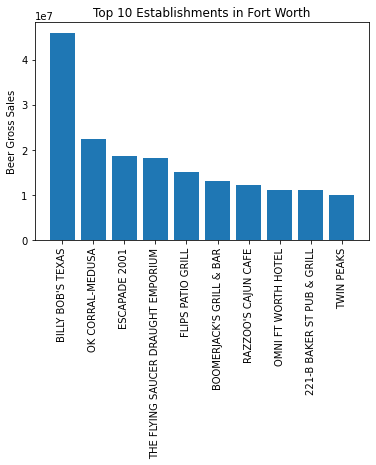

In [17]:
top_10_fort_worth_establishments = fort_worth_receipts_counts.iloc[:10, ]

fig, ax = plt.subplots()
ax.bar(top_10_fort_worth_establishments.index, top_10_fort_worth_establishments["Beer Receipts"])
ax.set_xticklabels(top_10_fort_worth_establishments.index, rotation=90)
ax.set_ylabel("Beer Gross Sales")
ax.set_title("Top 10 Establishments in Fort Worth")
plt.show()